<a href="https://colab.research.google.com/github/Zander073/Logistic-Regression-from-Scratch/blob/main/Logistic_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

Logistic regression is a probabilistic based classification model. The model determines some probability of an input being some class and assigns the class based on its relative probability of being in that class. 



Given two possible classifications $0$ and $1$, our LR model will assign some input $x$ with the following rule:

Assign 1 if $P(y=1|x,Θ) > 0.5$ and assign $0$ otherwise where  $\Theta$ is a set of parameters. The parameters of our model will be the trained weights and bias. 


Because we always want the probability to range from 0 to 1, we use a sigmoid function: $σ(z)=1/(1+e^{-z})$ where  $z=w.T*X+b$

The sigmoid function ensures that the output will be within 0 and 1 because:

$\lim_{z \to ∞} σ(z) = 1$

$\lim_{z \to -∞} σ(z) = 0$

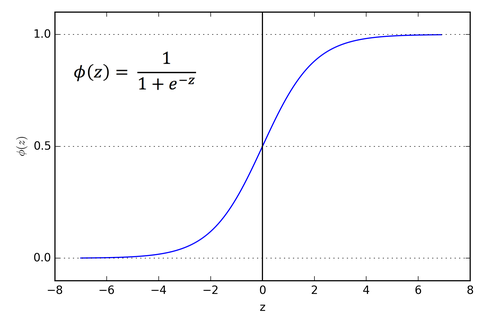

We then say our hypothesis (y-hat) is equal to the sigmoid of our activation:

$\hat{y}=σ(z)$ where  $z=w.T*X + b$

In [ ]:
# Summation function:
def summation(w, X, b):
  """
  w: Numpy array of weights with size (n x 1)
  X: Numpy array of inputs with size (m x n)
  b: Bias scalar as a real number

  returns: Summation between inputs, weights, and bias
  """
  return np.dot(w.T, X) + b

# Sigmoid function:
def sigmoid(z):
  """
  z: Numpy array dot product of weights and inputs plus bias

  returns: sigmoid ranging from 0 to 1
  """
  return 1 / (1 + np.exp(-z))

Because our model produces a hypothesis $\hat{y}$, to improve our model's accuracy, we have compute the loss between our hypothesis and the groundtruth value $y$. This is known as the Binary Cross Entropy Loss function (log-loss): $J(w,b)=L(\hat{y}, y)$

Where $L(\hat{y}, y) = \frac{-1}{m}\sum_{i=1}^{m}[(y^{(i)})log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$

The outout of the loss is a simple average of the differences between each hypothesis and its relative groundtruth value.

In [ ]:
def loss(y_hat, y):
  loss = -np.mean(y * (np.log(y_hat)) - (1 - y) * np.log(1 - y_hat))
  return loss

Now to actually utilize the loss function to improve our model's parameters, we have to use Gradient Descent. Since the Loss function is a three dimensional convex function, we can take the partial derivative of our loss function, $J(w,b)$ with respect to $w$ and with respect to $b$. Using these partial derivatives, we can step towards the optimal set of parameters (the apex of the convex). 

After taking each respective partial derivative, you're left with:

$dw=\frac{1}{m}\sum_{i=1}^{m}((\hat{y}^{(i)}-y^{(i)}) * x^{(i)})$

$db=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})$ 

In [ ]:
def gradients(X, y_hat, y):
  m = X.shape[0]
  dw = (1 / m) * np.dot(X.T, (y_hat - y))
  db = (1 / m) * np.sum((y_hat - y))
  return dw, db

def normalize(X):
  m, n= X.shape
  for i in range(n):
    X = (X - X.mean(axis=0))/X.std(axis=0)
  return X

def train(X, y, bs, epochs, alpha):
  m, n = X.shape
  w = np.zeros((n,1))
  b = 0

  y = y.reshape(m,1)
  x = normalize(X)

  losses = []

  for epoch in range(epochs):
    for i in range((m - 1) // bs + 1):
      start_i = i*bs
      end_i = start_i + bs
      xb = X[start_i:end_i]
      yb = y[start_i:end_i]
